In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


Import the dataset

In [24]:
df = pd.read_csv(r'C:\Users\Léandre\Desktop\projet asus\Neuromatch\hcp_behavior_unfiltered.csv')

# Preview the first few rows
df.head()




,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


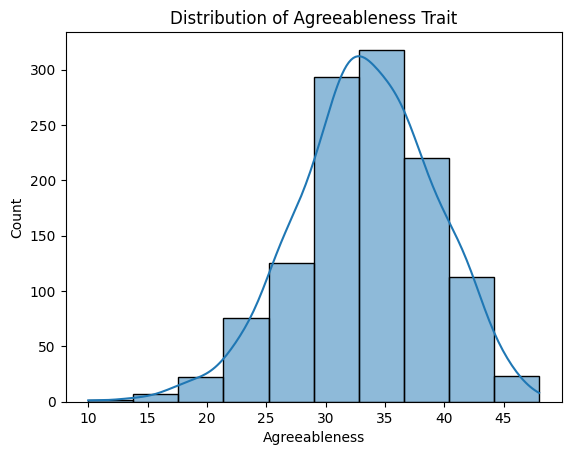

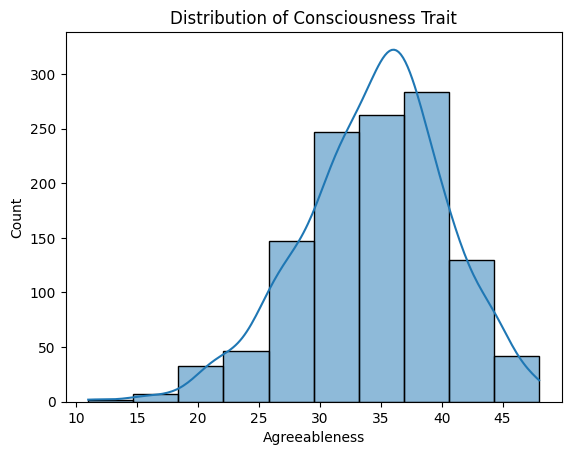

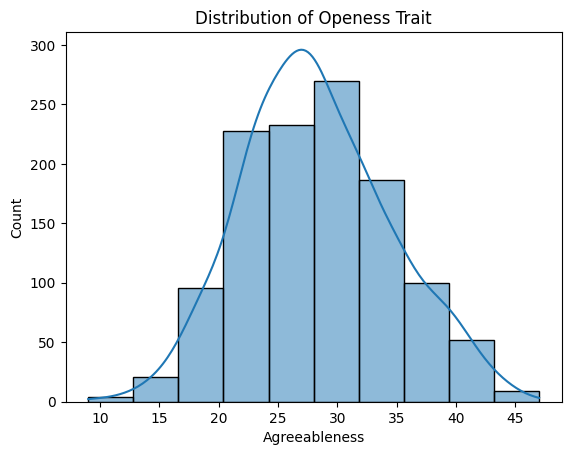

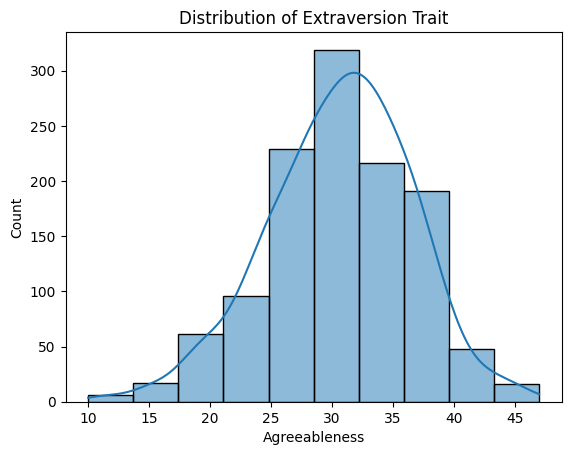

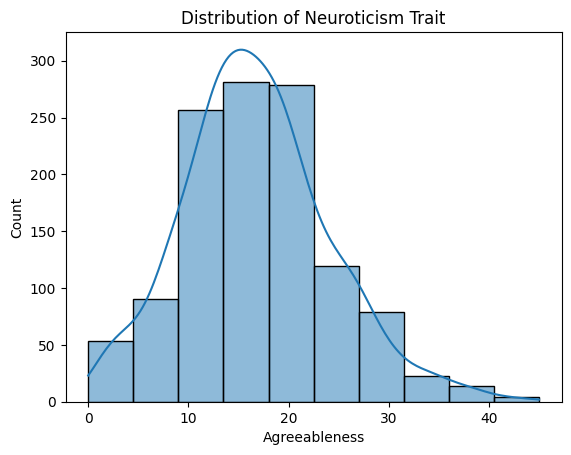

In [25]:
## Basic EDA to visualize the distribution of each big five traits
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['NEOFAC_A'], bins=10, kde=True)
plt.title('Distribution of Agreeableness Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_C'], bins=10, kde=True)
plt.title('Distribution of Consciousness Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_O'], bins=10, kde=True)
plt.title('Distribution of Openess Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_E'], bins=10, kde=True)
plt.title('Distribution of Extraversion Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_N'], bins=10, kde=True)
plt.title('Distribution of Neuroticism Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()


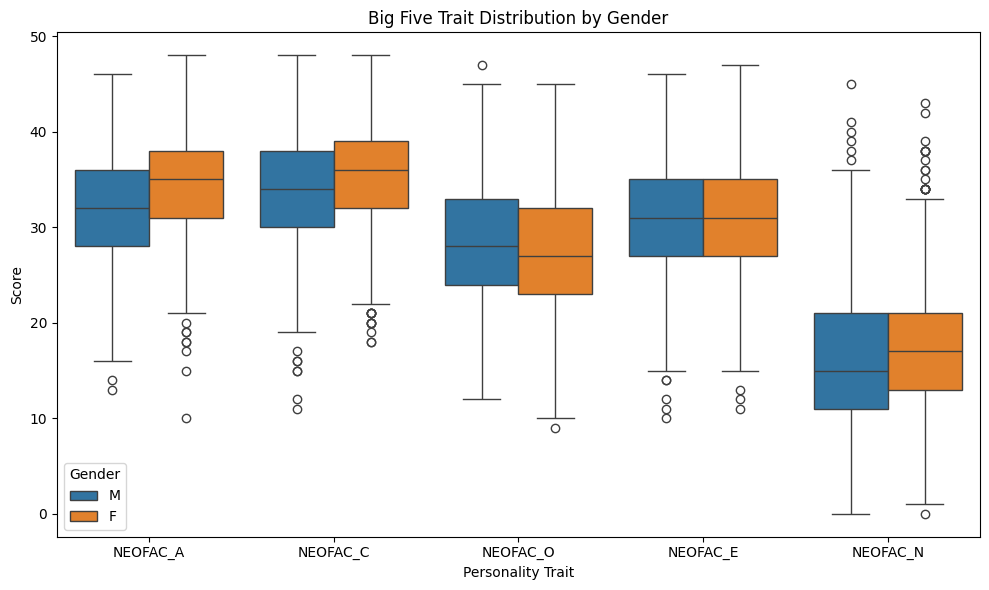

In [26]:
#visualize the differences in agreableness amongst the two genders

# Plot boxplots

df_long = pd.melt(df,
                  id_vars='Gender',
                  value_vars=['NEOFAC_A', 'NEOFAC_C', 'NEOFAC_O', 'NEOFAC_E', 'NEOFAC_N'],
                  var_name='Trait',
                  value_name='Score')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Trait', y='Score', hue='Gender', data=df_long)

plt.title('Big Five Trait Distribution by Gender')
plt.xlabel('Personality Trait')
plt.ylabel('Score')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


List of things to verify
Pre-processing
- Extreme score $
- Sample size
- Missing data $

Postulats
- Indépendance des scores
- Normalité
- Normalité des résiduels et de l'homoscédasticité
- Homogénéité de la variance des résiduels
- Matrice de corrélation
- Multicolinéarité


In [45]:
import numpy as np
from scipy import stats

relevant_columns = ['Subject','Age','Gender','NEOFAC_A','NEOFAC_C','NEOFAC_N','NEOFAC_O','NEOFAC_E' ] ##insert relevant column
subset = df[relevant_columns]

#Transform gender column
subset["Gender_binary"] = subset["Gender"].map({"M":0,"F":1})

#Transform age column

subset = subset[subset["Age"] != "36+"]
def get_midpoint(age_range):
    start, end = map(int, age_range.split("-"))
    return (start + end) / 2

# Apply to the age range column (replace 'AgeRange' with your actual column name)
subset["AgeMidpoint"] = subset["Age"].apply(get_midpoint)



C:\Users\Léandre\AppData\Local\Temp\ipykernel_11764\1113691861.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Gender_binary"] = subset["Gender"].map({"M":0,"F":1})


In [ ]:
# Keep only numeric columns
numeric_subset = subset.select_dtypes(include=[np.number])

# Compute z-scores
z_scores = np.abs(stats.zscore(numeric_subset, nan_policy='omit'))

# Identify outlier locations
outliers = np.where(z_scores > 3)
print("Outlier indices:", outliers)


sns.boxplot(x=subset['NEOFAC_A'])
plt.title("Boxplot of Agreeableness Scores (NEOFAC_A)")
plt.xlabel("NEOFAC_A")
plt.show()


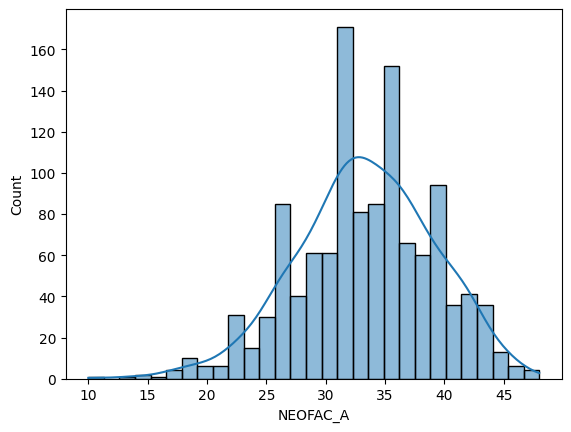

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

#Normalité de la distribution

sns.histplot(df['NEOFAC_A'], kde=True)
plt.show()

In [28]:
import numpy as np
from scipy.stats import chi2_contingency


chi2, p, dof, expected = chi2_contingency(df['NEOFAC_A'])

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[27. 29. 37. ... 28. 27. 34.]


p-value is over 0.05, so that means that there isn't a significant relationship between the data!

Shapiro-Wilk test p-value: 7.211587516330701e-05


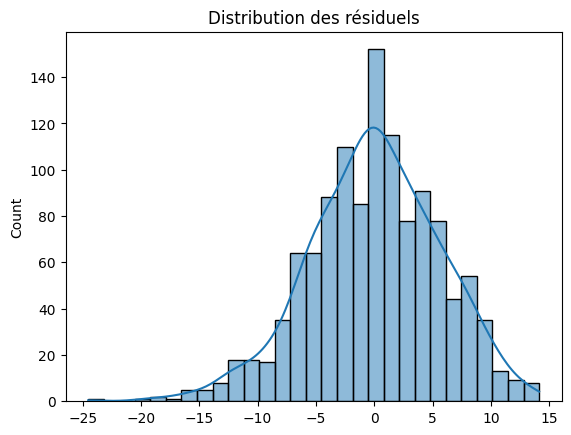

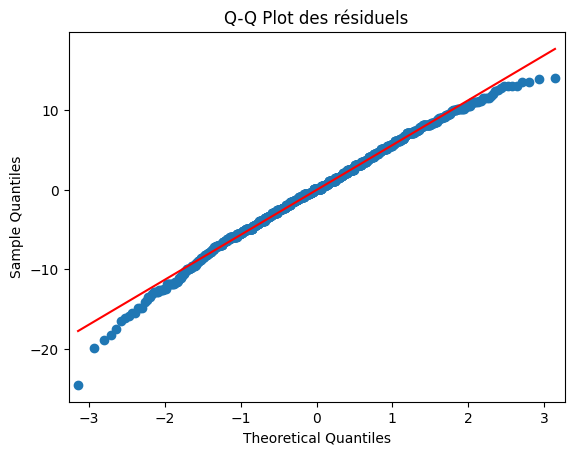

In [29]:
#Residual's normality

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exemple : modèle linéaire avec agreeableness comme variable dépendante
model = smf.ols('NEOFAC_A ~ Age + Gender', data=df).fit()
residuals = model.resid

from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value}")

sns.histplot(residuals, kde=True)
plt.title("Distribution des résiduels")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot des résiduels")
plt.show()





Shapiro p-value is 7.211, so the residuals are normally distributes

{'Lagrange multiplier statistic': np.float64(1.803952826168873), 'p-value': np.float64(0.7717590800390302), 'f-value': np.float64(0.44978424367718267), 'f p-value': np.float64(0.7726126682631735)}


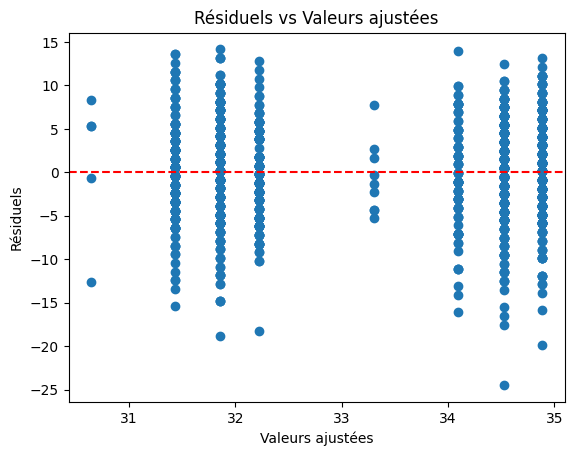

In [10]:
#homoscedasticity

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résiduels")
plt.title("Résiduels vs Valeurs ajustées")
plt.show()



In [30]:
#multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Créer un DataFrame des variables explicatives (sans constante)
X = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
X = X.drop(columns='Intercept', errors='ignore')  # si présente

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


       Variable       VIF
0  Age[T.26-30]  1.279737
1  Age[T.31-35]  1.139036
2    Age[T.36+]  1.004630
3   Gender[T.M]  1.423403


From now on, I will upload the data from the fMRI.ipynb, which is the average contrast of the TPJ, mPFC, PCC, and merge it with the Big Five personnality trait, to start our analysis

In [48]:
DNM_TOM = pd.read_csv('TPJ-MPFC-PCC.csv')

#merge Brain data + personnality data
DNM_TOM  = DNM_TOM .rename(columns={'subject': 'Subject'})

merged_df = pd.merge(DNM_TOM , subset, on='Subject') 

merged_df.head()

,Subject,MPFC_R,TPJ_R,PCC_R,MPFC_L,TPJ_L,PCC_L,Age,Gender,NEOFAC_A,NEOFAC_C,NEOFAC_N,NEOFAC_O,NEOFAC_E,Gender_binary,AgeMidpoint
0,100307,-4.934329,-10.090752,-6.302950,-7.241586,-3.023612,-3.139072,26-30,F,37.0,35.0,15.0,24.0,37.0,1,28.0
1,100408,9.896374,-8.497348,2.975091,11.486141,0.790821,13.709309,31-35,M,33.0,34.0,15.0,29.0,33.0,0,33.0
2,101915,4.538005,-13.194756,-0.844830,2.297998,-5.147934,3.342183,31-35,F,35.0,45.0,8.0,30.0,31.0,1,33.0
3,102816,22.602027,9.437142,30.062134,24.063980,27.364733,31.296698,26-30,F,36.0,32.0,10.0,27.0,31.0,1,28.0
4,103414,5.113721,-9.584408,8.525888,-0.835535,4.934580,-0.088056,22-25,F,27.0,31.0,20.0,30.0,34.0,1,23.5


In [56]:
#First, let's do a linear regression
import statsmodels.api as sm

# Predict Agreeableness from brain activation
X = merged_df[['MPFC_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())




                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.034
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     1.137
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.338
Time:                         16:07:35   Log-Likelihood:                -321.14
No. Observations:                  100   AIC:                             650.3
Df Residuals:                       96   BIC:                             660.7
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.0661      5.728 

In [57]:
# Predict Agreeableness from brain activation
X = merged_df[['MPFC_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())




                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.074
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.364
Time:                         16:07:42   Log-Likelihood:                -321.23
No. Observations:                  100   AIC:                             650.5
Df Residuals:                       96   BIC:                             660.9
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.2669      5.760 

In [58]:
# Predict Agreeableness from brain activation
X = merged_df[['TPJ_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.033
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.077
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.363
Time:                         16:07:47   Log-Likelihood:                -321.23
No. Observations:                  100   AIC:                             650.5
Df Residuals:                       96   BIC:                             660.9
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.1449      5.730 

In [59]:
# Predict Agreeableness from brain activation
X = merged_df[['TPJ_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     1.328
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.270
Time:                         16:08:00   Log-Likelihood:                -320.85
No. Observations:                  100   AIC:                             649.7
Df Residuals:                       96   BIC:                             660.1
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.7102      5.730 

In [60]:
# Predict Agreeableness from brain activation
X = merged_df[['PCC_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.065
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.368
Time:                         16:08:32   Log-Likelihood:                -321.24
No. Observations:                  100   AIC:                             650.5
Df Residuals:                       96   BIC:                             660.9
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.1889      5.742 

In [61]:
# Predict Agreeableness from brain activation
X = merged_df[['PCC_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:                NEOFAC_A   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.063
Date:              lun., 21 juil. 2025   Prob (F-statistic):              0.369
Time:                         16:08:43   Log-Likelihood:                -321.25
No. Observations:                  100   AIC:                             650.5
Df Residuals:                       96   BIC:                             660.9
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.1864      5.803 

In [62]:
corr_results = merged_df[['MPFC_R', 'TPJ_R', 'PCC_R','MPFC_L', 'TPJ_L', 'PCC_L', 'NEOFAC_A']].corr()
print(corr_results['NEOFAC_A'])


MPFC_R     -0.028332
TPJ_R      -0.025782
PCC_R      -0.011016
MPFC_L      0.046622
TPJ_L       0.084437
PCC_L       0.013100
NEOFAC_A    1.000000
Name: NEOFAC_A, dtype: float64


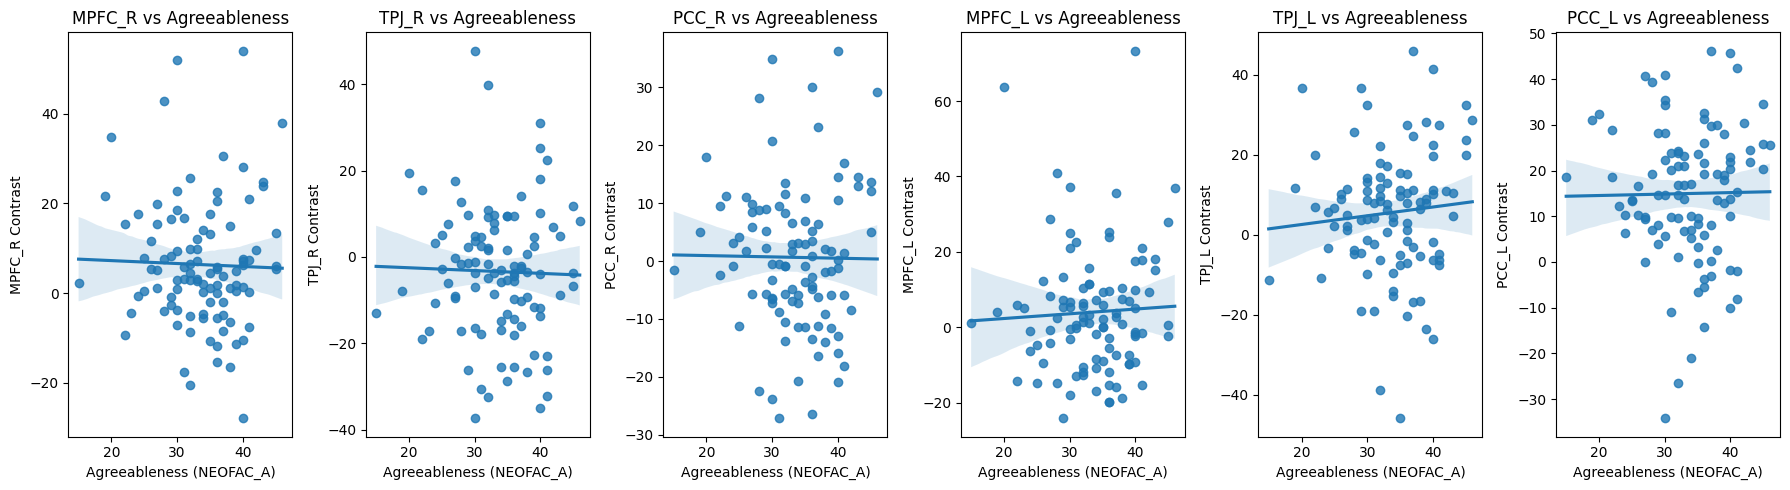

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

regions = ['MPFC_R', 'TPJ_R', 'PCC_R', 'MPFC_L', 'TPJ_L', 'PCC_L']

# Set up subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 5))

# Plot each region
for i, region in enumerate(regions):
    sns.regplot(data=merged_df, x='NEOFAC_A', y=region, ax=axes[i])
    axes[i].set_title(f'{region} vs Agreeableness')
    axes[i].set_xlabel('Agreeableness (NEOFAC_A)')
    axes[i].set_ylabel(f'{region} Contrast')

plt.tight_layout()
plt.show()
